<a href="https://colab.research.google.com/github/kghhhhui/baby_spsu/blob/main/01_simple_spsu_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# coding: utf-8

# spectral subtraction: one of noise reduction method
#                       This is a simple python script, is not advanced one.
#
# Usage:
#    specify wav file names below,
#       infile: input wav file including noise
#       outfile: output wav file
#       noisefile: noise only wav file, that is some (noise only) portion of input wav edited by manual (ex: Audacity)
#
#     then, python3 ss1.py

# Check version:
#
#  Python 3.6.4 win32 64bit
#  Windows 10, 64bit
#  numpy (1.14.0)
#  scipy (1.0.0)
#  librosa (0.6.0)


In [ ]:
import numpy as np
import scipy
import librosa
import librosa.display
import matplotlib.pyplot as plt         # 그래프를 출력하기 위한 모듈

In [ ]:
# edit following wav file name
infile='/content/mantram_short.wav' #노이즈 포함 wav 파일
outfile='output_short.wav' #출력 wav 파일
noisefile='/content/noise_short.wav' #노이즈만 있는 파일


In [ ]:
# load input file, and stft (Short-time Fourier transform)
print ('load wav', infile)
w, sr = librosa.load( infile, sr=None, mono=True) # keep native sr (sampling rate) and trans into mono
s= librosa.stft(w)    # Short-time Fourier transform
ss= np.abs(s)         # get magnitude
angle= np.angle(s)    # get phase
b=np.exp(1.0j* angle) # use this phase information when Inverse Transform



load wav /content/mantram_short.wav


In [ ]:
# load noise only file, stft, and get mean
print ('load wav', noisefile)
nw, nsr = librosa.load( noisefile, sr=None, mono=True)
ns= librosa.stft(nw)
nss= np.abs(ns)
mns= np.mean(nss, axis=1) # get mean



load wav /content/noise_short.wav


In [ ]:
# subtract noise spectral mean from input spectral, and istft (Inverse Short-Time Fourier Transform)
sa= ss - mns.reshape((mns.shape[0],1))  # reshape for broadcast to subtract
sa0= sa * b  # apply phase information
y= librosa.istft(sa0) # back to time domain signal



In [ ]:
# save as a wav file
scipy.io.wavfile.write(outfile, sr, (y * 32768).astype(np.int16)) # save signed 16-bit WAV format
#librosa.output.write_wav(outfile, y , sr)  # save 32-bit floating-point WAV format, due to y is float
print ('write wav', outfile)


write wav output_short.wav


#그래프 그리기


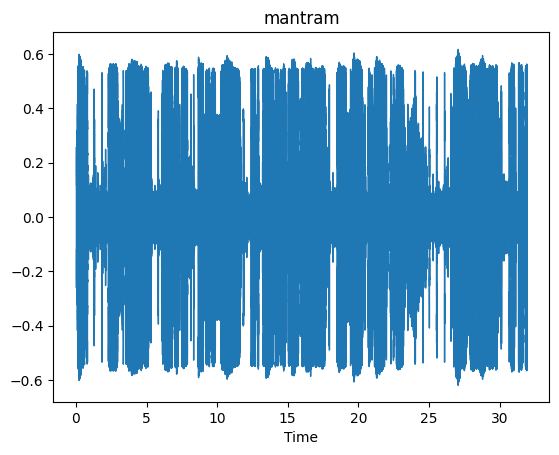

In [ ]:
audio = 'mantram_short.wav'
y, sr = librosa.load(audio)             # 소리 파일 불러오기

librosa.display.waveshow(y, sr=sr)      # 소리 데이터를 그래프로 표현하기
plt.title('mantram')                   # 그래프 제목 설정하기
plt.show()

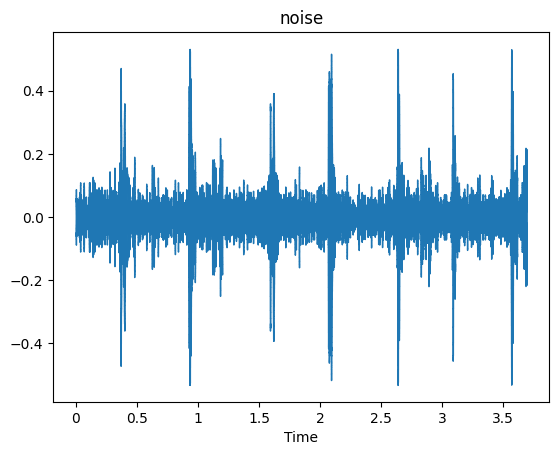

In [ ]:
audio = 'noise_short.wav'
y, sr = librosa.load(audio)             # 소리 파일 불러오기

librosa.display.waveshow(y, sr=sr)      # 소리 데이터를 그래프로 표현하기
plt.title('noise')                   # 그래프 제목 설정하기
plt.show()

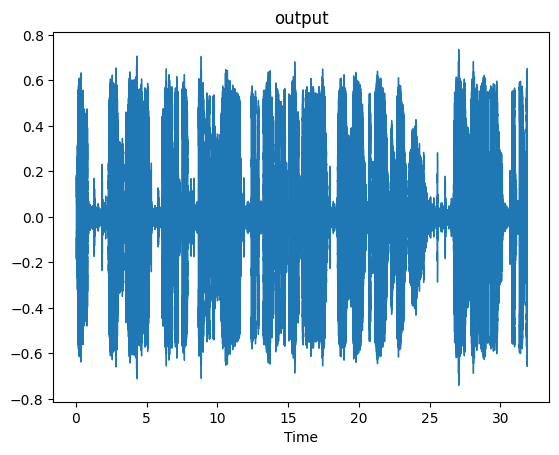

In [ ]:
audio = 'output_short.wav'
y, sr = librosa.load(audio)             # 소리 파일 불러오기

librosa.display.waveshow(y, sr=sr)      # 소리 데이터를 그래프로 표현하기
plt.title('output')                   # 그래프 제목 설정하기
plt.show()